In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
mpl.rc('figure', figsize=[12,8])  #set the default figure size

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

In [2]:
class KNNRegressor(sklearn.base.RegressorMixin):
    
    def __init__(self, k):
        self.k = k
        super().__init__()
        
    def fit(self, X,y):
        self.X = X
        self.y = y
        self.nn = NearestNeighbors(n_neighbors=self.k)
        self.nn.fit(X.reshape(-1,1))
        
    def predict(self, T):
        predictions = []
        _, neighbors = self.nn.kneighbors(T)
        regressor = LinearRegression()
        for i in range(T.shape[0]):
            regressor.fit(self.X[neighbors[i]], self.y[neighbors[i]])
            predictions.append(regressor.predict([T[i]]))
        return np.asarray(predictions)

In [3]:
def f_func(x):
        return 3.0 + 4.0 * x - 0.05 * x**2

def generate_data(size=200):
    X = np.sort(np.random.random(size) * 100)
    y = f_func(X) + (np.random.random(size) - 0.5) * 50
    return(X,y)

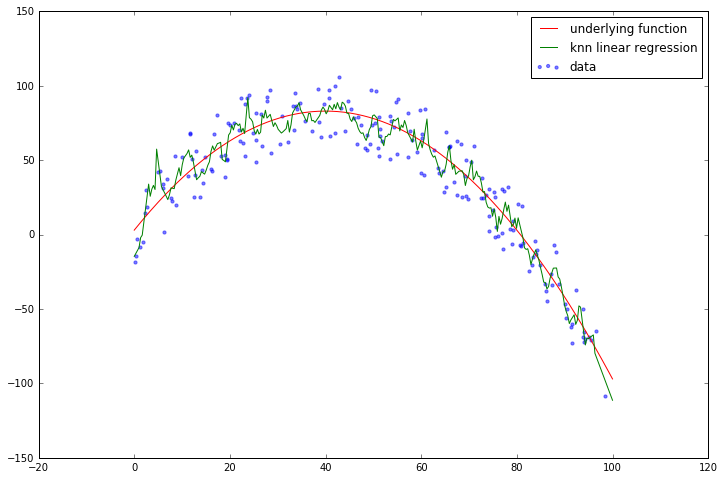

In [4]:
u = np.linspace(0,100,300)
f = f_func(u)
X, y = generate_data()
knn_reg = KNNRegressor(5)
knn_reg.fit(X.reshape(-1,1), y)
predictions = knn_reg.predict(u.reshape(-1,1))

plt.plot(u,f, 'r', label='underlying function')
plt.scatter(X, y, s=10, color='b', alpha=0.5, label='data')
plt.plot(u,predictions, color='g', label='knn linear regression')
plt.legend()